In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fire_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes']=np.where(df['Classes'].str.contains('not fire '),0,1)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


In [9]:
X=df.drop('FWI',axis=1) #Independent features
Y=df['FWI'] # Output features

In [10]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((182, 11), (61, 11), (182,), (61,))

In [13]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.530461,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.444318,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.059901,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.287130,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.762758,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.612699,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.534836,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.733039,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.606461,0.114897
Classes,0.530461,-0.444318,-0.059901,-0.287130,0.762758,0.612699,0.534836,0.733039,0.606461,1.000000,0.178121


<AxesSubplot: >

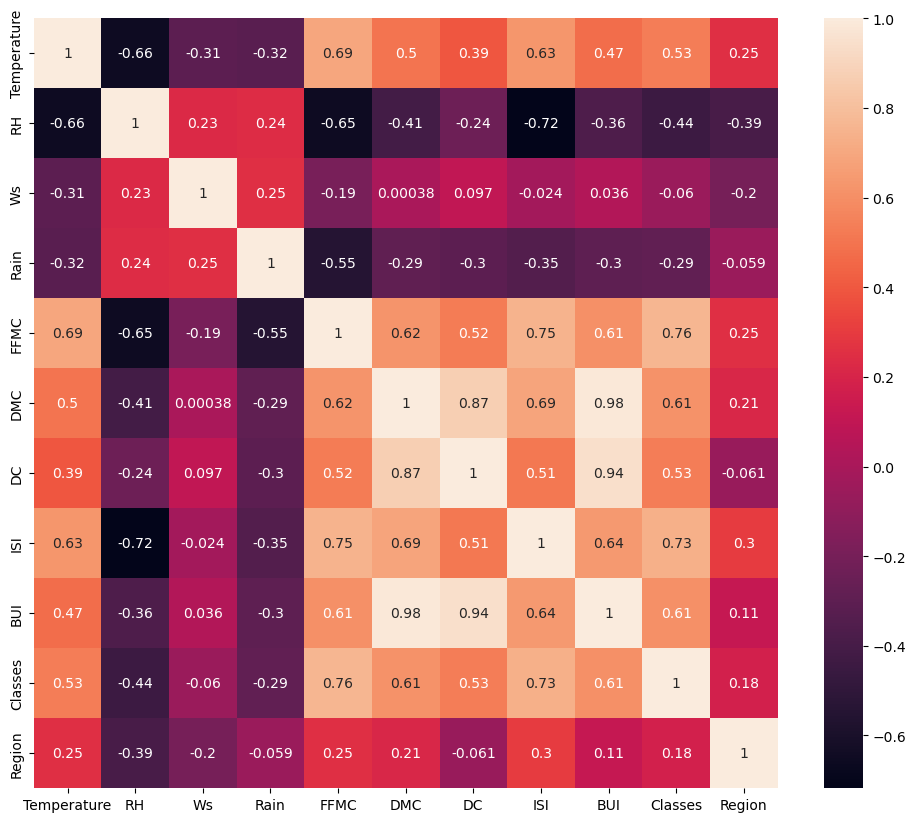

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [15]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name=corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr
# Finding the features which are highly correlated

In [16]:
corr_features=correlation(X_train,0.85)

In [17]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [18]:
X_train.shape,X_test.shape

((182, 9), (61, 9))

# Feature standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

<AxesSubplot: >

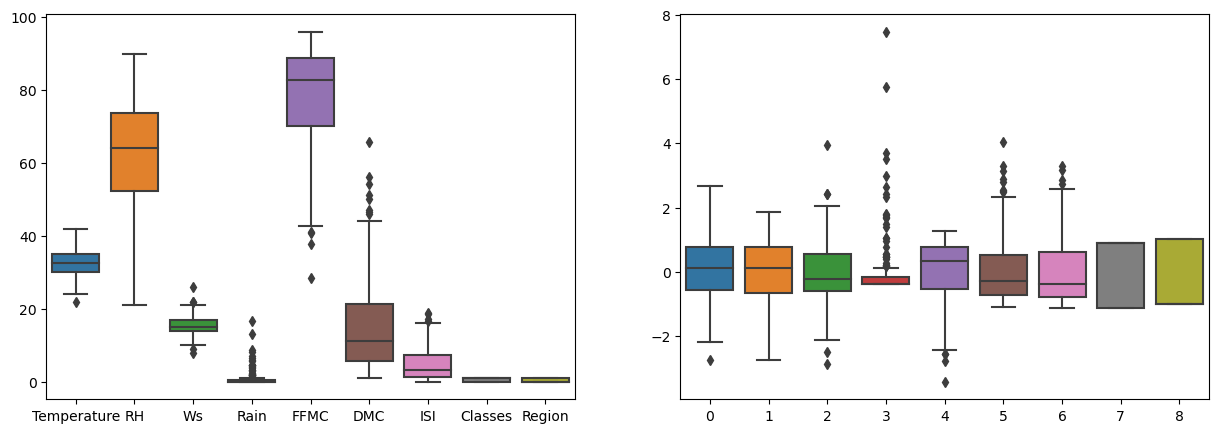

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(X_train)

plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean absolute error:  0.5537793466350764
R2 score:  0.9845654300720647


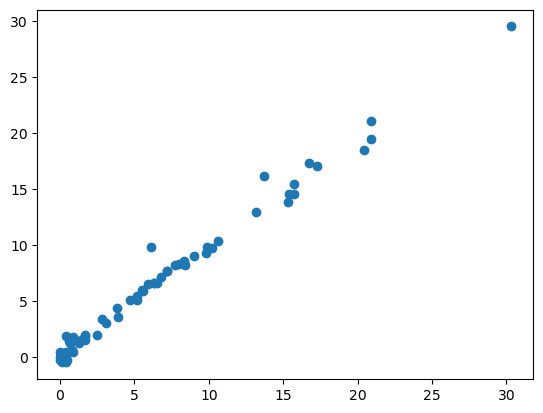

In [23]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train) #Fitting the model on both dependent and independent features of training data
y_pred=linreg.predict(X_test_scaled) #Predicting the dependent feature using independent features of test data 
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Mean absolute error:  1.133175994914409
R2 score:  0.9492020263112388


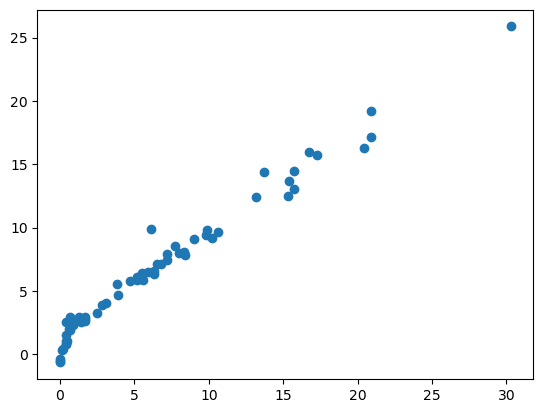

In [25]:
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

In [30]:
from sklearn.linear_model import LassoCV

Mean absolute error:  0.6213686854391466
R2 score:  0.9819008215598604


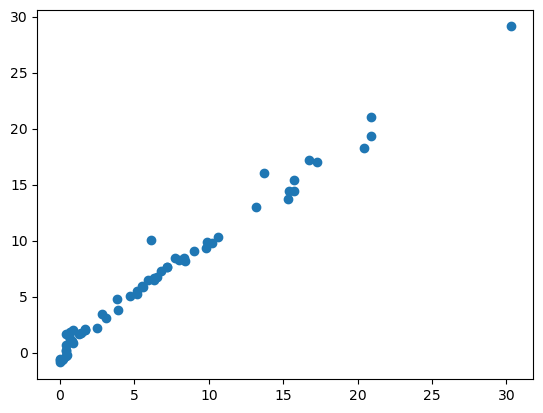

In [31]:
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
y_pred=lassocv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

In [32]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [35]:
from sklearn.linear_model import Ridge

Mean absolute error:  0.5648148058820259
R2 score:  0.9841592264738229


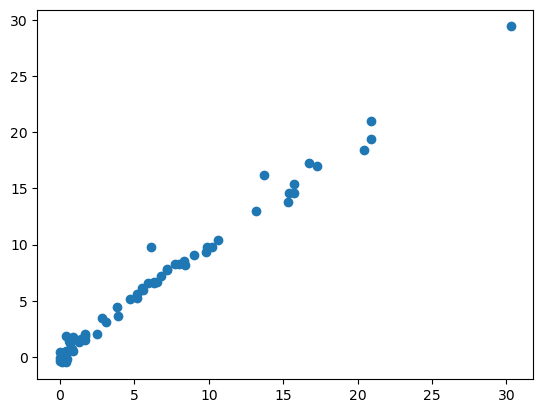

In [36]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

Mean absolute error:  1.852822274870475
R2 score:  0.8766004180080235


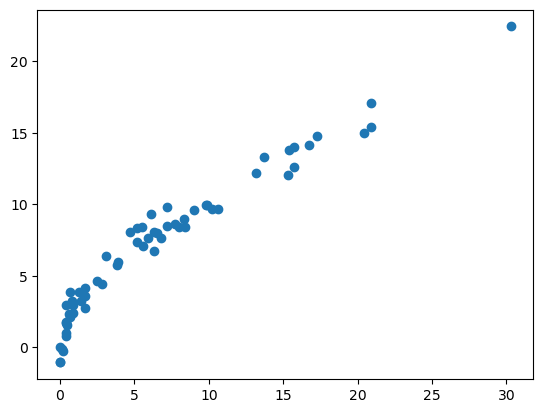

In [37]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet()
enet.fit(X_train_scaled,y_train)
y_pred=enet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.5648148058819792
R2 score:  0.9841592264738244


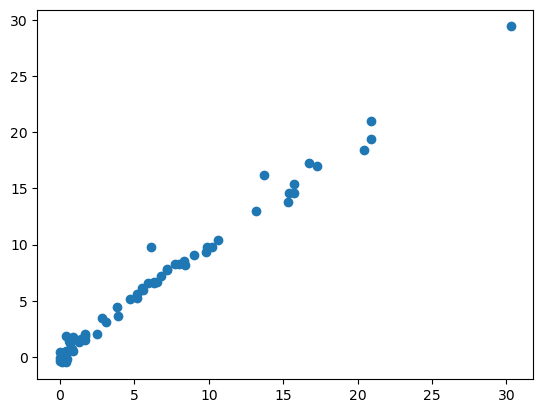

In [38]:
from sklearn.linear_model import RidgeCV
rcv=RidgeCV()
rcv.fit(X_train_scaled,y_train)
y_pred=rcv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

Mean absolute error:  0.6474683970625832
R2 score:  0.9814239008907729


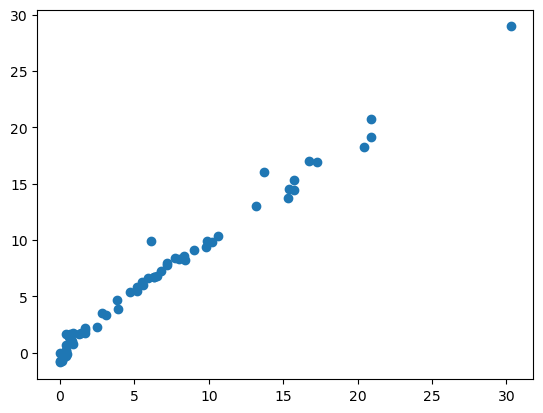

In [40]:
from sklearn.linear_model import ElasticNetCV
ecv=ElasticNetCV()
ecv.fit(X_train_scaled,y_train)
y_pred=ecv.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score)
plt.scatter(y_test,y_pred)

In [41]:
scaler

StandardScaler()

In [42]:
ridge

Ridge()

In [43]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))